In [1]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from IPython.display import Audio

In [52]:
Fs, data = wavfile.read('peterpiper.wav')
# Play initial audio
Audio(data, rate=Fs)

In signal processing, a comb filter is a filter implemented by adding a delayed version of a signal to itself, causing constructive and destructive interference. The frequency response of a comb filter consists of a series of regularly spaced notches, giving the appearance of a comb. [1]

Применяются для обработки аудиосигналов, в частности для создания эффекта эха. [2]

[1] https://en.wikipedia.org/wiki/Comb_filter

[2] https://ru.wikipedia.org/wiki/Гребенчатый_фильтр

In [69]:

def add_echo_using_filter(sample_rate, signal_data, delay, alpha):
#      Add echo to the given signal using filter
#      sample_rate (int) = sample rate of input signal
#      signal_data (np.ndarray) = input signal
#      delay (int) = delay of echo start in seconds
#      alpha (float) = attenuation constant to reduce the amplitude of the echo signal (echo strength) 
#      returns echoed signal (np.ndarray)
#
    # multiply delay in seconds  by sampling frequency in samples 
    # per second to get number of samples for delay
    delay_idx = int(sample_rate*delay)
    b = [1]
    b.extend(np.zeros(delay_idx-1))
    b.append(alpha)
    
    output_signal = signal.lfilter(b, 1, signal_data)
    output_signal = output_signal.astype(np.int16)
     # original signal
    plt.figure(1)
    plt.plot(signal_data,'b')
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.figure(2)
     # echoed signal
    plt.plot(output_signal,'r')
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.show()
    
    return output_signal

In [72]:
def add_echo(sample_rate, signal_data, delay, alpha):
#      Add echo to the given signal using filter
#      sample_rate (int) = sample rate of input signal
#      signal_data (np.ndarray) = input signal
#      delay (int) = delay of echo start in seconds
#      alpha (float) < 1  = attenuation constant to reduce the amplitude of the echo signal (echo strength) 

#      returns echoed signal (np.ndarray)
#
    delay_idx = int(sample_rate*delay)
    # kinda impelementation of filter method used in `add_echo_using_filter`
    output_signal = np.zeros(signal_data.shape).astype(np.int16)
    output_signal[1:delay_idx] = signal_data[1:delay_idx]
    for i in range(delay_idx+1, len(signal_data)):
        output_signal[i] = signal_data[i] + alpha*signal_data[i-delay_idx]
        
      # original signal
    plt.figure(1)
    plt.plot(signal_data,'b')
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.figure(2)
     # echoed signal
    plt.plot(output_signal,'r')
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.show()
    
    return output_signal

Enter integer number indicating delay of an echo in seconds:
1
Enter float number indicating echo strength:
0.8


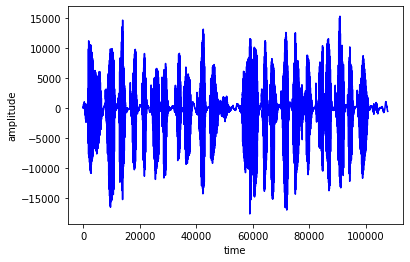

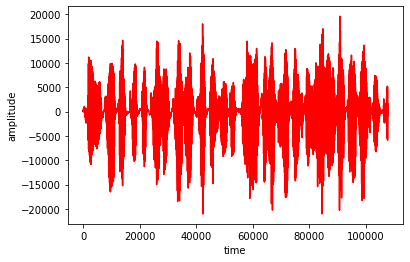

Result: 


In [71]:
print('Enter integer number indicating delay of an echo in seconds:')
delay = int(input())
print('Enter float number indicating echo strength:')
alpha = float(input())
echoed = add_echo_using_filter(Fs, data, delay, alpha)
print('Result: ')
Audio(echoed,rate= Fs)

Enter integer number indicating delay of an echo in seconds:
1
Enter float number indicating echo strength:
0.8


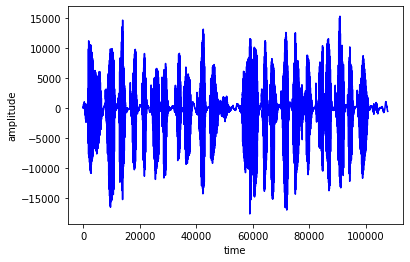

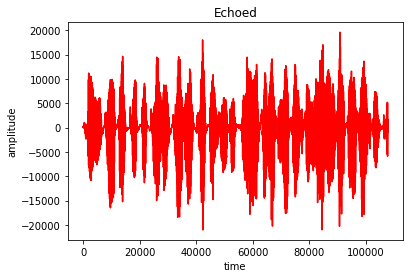

Result: 


In [66]:
print('Enter integer number indicating delay of an echo in seconds:')
delay = int(input())
print('Enter float number indicating echo strength:')
alpha = float(input())
echoed = add_echo(Fs, data, delay, alpha)
print('Result: ')
Audio(echoed,rate= Fs)